In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import create_network as cn
import networkx as nx
import os
import matplotlib
from scipy.stats import pearsonr
import community as community_louvain

In [2]:
Gs, names = cn.create_network14_dataset(include=['Email', 'Jazz', 'NS', 'Power', 'Router', 'USAir'])
names

['infectious',
 'contiguous',
 'celegans',
 'dolphin',
 'sfhh',
 'french_school',
 'USAir',
 'Power',
 'Router',
 'Jazz',
 'NS',
 'Email']

In [3]:
# create list of all data frames
results_dir = './data_SIR_centrality2/'
files = os.listdir(results_dir)
dfs = []

for name in names:
    for file in files:
        if name in file:
            dfs.append(pd.read_csv(results_dir + file, sep='\t').drop('Unnamed: 0', axis=1))

In [4]:
# create ranking 
dfs_ranked = []
for df in dfs:
    df_ranked = pd.DataFrame()

    for col in df.columns:
        df_ranked[f'{col}_ranked'] = df[col].rank(method='first')

    dfs_ranked.append(df_ranked)
dfs_ranked[0]

,gli_method_1_hop_ranked,gravity_centrality_1_hop_ranked,grav_centrality_plus_1_hop_ranked,ninl_1_hop_ranked,improved_gravity_centrality_1_hop_ranked,improved_gravity_centrality2_1_hop_ranked,improved_gravity_centrality_plus_1_hop_ranked,improved_gravity_centrality2_plus_1_hop_ranked,local_gravity_centrality_1_hop_ranked,mcgm_1_hop_ranked,...,mcde_1_hop_ranked,mcdwe_1_hop_ranked,erm_1_hop_ranked,new_gli_method_1_hop_ranked,local_h_index_1_hop_ranked,dsr_1_hop_ranked,edsr_1_hop_ranked,LS_1_hop_ranked,ECRM_1_hop_ranked,SIR_value_ranked
0,370.0,363.0,361.0,365.0,363.0,373.0,360.0,364.0,375.0,323.0,...,389.0,389.0,360.0,364.0,361.0,404.0,404.0,384.0,361.0,333.0
1,267.0,278.0,281.0,273.0,277.0,263.0,279.0,273.0,260.0,309.0,...,244.0,247.0,279.0,278.0,276.0,204.0,253.0,226.0,279.0,262.0
2,288.0,287.0,289.0,296.0,293.0,285.0,295.0,292.0,291.0,296.0,...,284.0,287.0,300.0,287.0,296.0,243.0,280.0,305.0,303.0,259.0
3,372.0,377.0,374.0,369.0,376.0,370.0,372.0,373.0,371.0,355.0,...,379.0,379.0,369.0,371.0,369.0,355.0,355.0,396.0,370.0,297.0
4,320.0,322.0,328.0,324.0,324.0,318.0,327.0,328.0,311.0,353.0,...,298.0,299.0,329.0,323.0,326.0,288.0,326.0,293.0,326.0,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,69.0,81.0,83.0,68.0,84.0,67.0,75.0,75.0,60.0,126.0,...,52.0,52.0,80.0,77.0,74.0,51.0,50.0,64.0,86.0,65.0
406,337.0,330.0,330.0,331.0,330.0,335.0,331.0,333.0,338.0,328.0,...,330.0,331.0,331.0,326.0,327.0,305.0,313.0,338.0,327.0,294.0
407,295.0,289.0,298.0,302.0,298.0,291.0,303.0,302.0,290.0,333.0,...,263.0,264.0,308.0,299.0,305.0,201.0,259.0,245.0,305.0,237.0
408,274.0,284.0,286.0,285.0,285.0,269.0,288.0,280.0,275.0,310.0,...,250.0,253.0,293.0,285.0,288.0,123.0,187.0,244.0,289.0,236.0


In [5]:
# compute rank difference to SIR_value_ranked
dfs_diff = []

for df in dfs_ranked:
    df_diff = pd.DataFrame()
    df_SIR_rank = df['SIR_value_ranked']

    for col in df.columns[:-1]: # exclude SIR_value_ranked
        df_diff[f'{col}_diff'] = df_SIR_rank - df[col]

    dfs_diff.append(df_diff)

dfs_diff[0][['gli_method_1_hop_ranked_diff', 'gravity_centrality_1_hop_ranked_diff']]

,gli_method_1_hop_ranked_diff,gravity_centrality_1_hop_ranked_diff
0,-37.0,-30.0
1,-5.0,-16.0
2,-29.0,-28.0
3,-75.0,-80.0
4,-52.0,-54.0
...,...,...
405,-4.0,-16.0
406,-43.0,-36.0
407,-58.0,-52.0
408,-38.0,-48.0


infectious


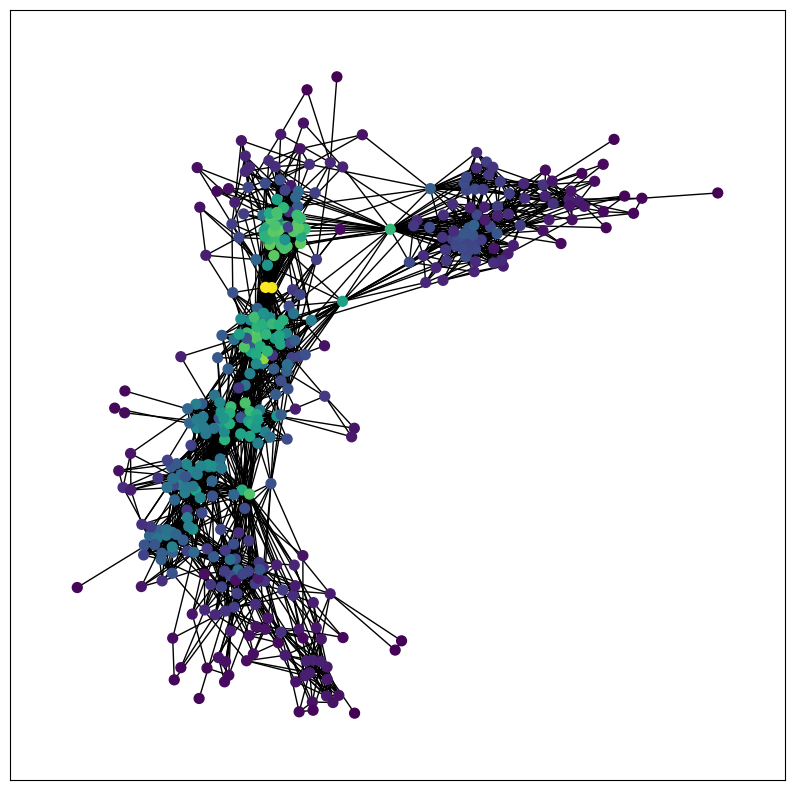

In [6]:
i=0
G = Gs[i]
SIR = dfs[i].SIR_value.to_numpy()
print(names[i])

fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx(G, node_color=SIR, ax=ax, node_size=50, with_labels=False)

Ich nehme mal an, dass die Reihnfolge der Knoten im nx Graphen und in den Excel files gleich ist. So sieht es zumindest in dem Plot aus und ich wüsste jetzt auch nicht, wie sich diese beiden Listen anderen falls matchen lassen sollten, ohne weitere Informationen.

In [7]:
df_compare = pd.DataFrame(index=dfs_diff[0].abs().sum().rank().index)
for df_diff, name in zip(dfs_diff, names):
    df_compare[name] = df_diff.abs().sum().rank(method='first')

In [8]:
df_compare = df_compare.reindex(df_compare.mean(axis=1).sort_values(ascending=True).index, axis=0)
df_compare['Mean'] = df_compare.mean(axis=1)
dfs_diff[0][df_compare.index[0:5]].mean(axis=1).to_numpy()

array([ -44.2,    3.2,  -29. ,  -76.8,  -43.8,  -33.2,  -22.4,  -10.2,
        -48.6,  -31.2,   47.2,   63.6,  -15.8,  -31.4,   16.8,   15.4,
       -132.2, -135.8,   31.4, -165.4, -153.4, -140.2, -117.4, -165.2,
        -39.4, -124.2,  -59.8,   10.6,   -3.6,   43.4,  139. ,   68.6,
         -3.8,   21.4,   24.6,    6.4,   76.2,   80.8,   -7.4,  -19.8,
         -7. ,    8.4,   56.6,   64.4,   27.2,   67. ,   -1.6,   71. ,
         90.2,   45.8,    4.4,   14.6,   33.4,   19.6,   29.6,    6.8,
          0.6,  -18.4,    4.8,   63.4,  -24. ,   -5.6,  -13.6,  -15. ,
          0.4,   41.6,  101. ,   57.6,   16.2,   27.2,   75.4,   49.2,
        118.8,   56.8,   64.8,   64.8,  -42.6,  -29.4,   -7.8,  -30.6,
         -4.2,    9.8,   12.6,   57.6,   82.6,  -33.2,   27. ,   81.6,
        165.4,   74.6,   56. ,   74. ,    1. ,   12.4,   17.2,   24. ,
        -14.6,  -38. ,    4.6,   63.8,   88. ,   57.4,    0.8,  -20.2,
         43.2,  -20.6,  -13.6,  -20.4,    1.6,   25.2,  -13.6,   -3.8,
      

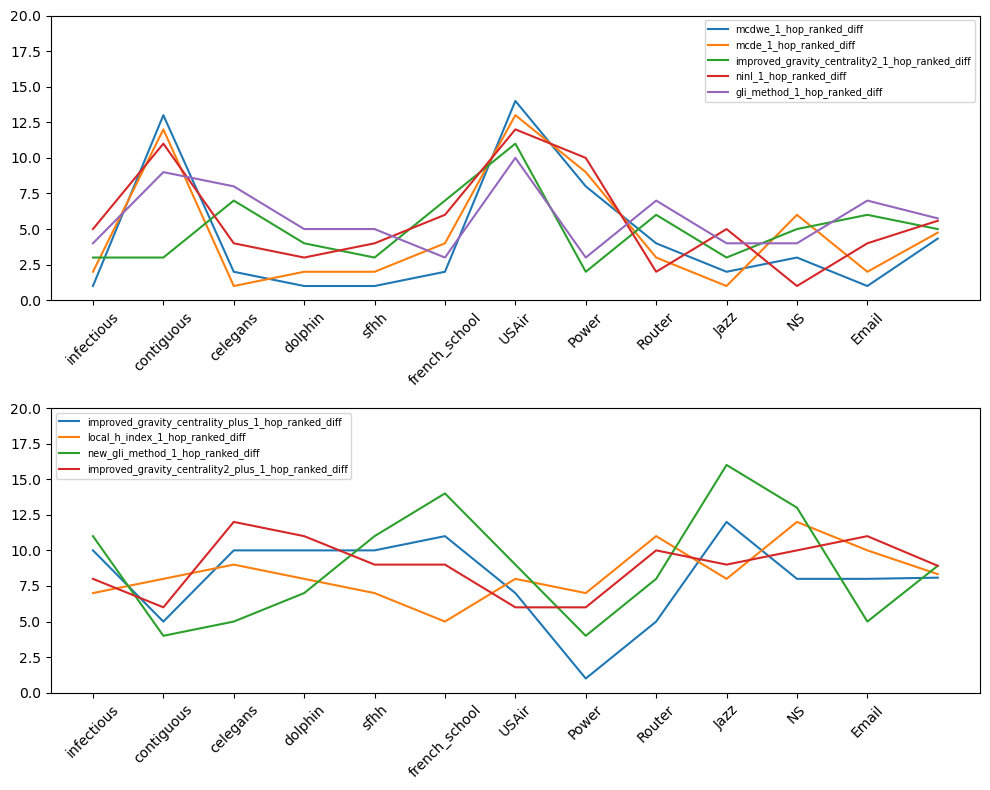

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))

for i in range(5): #df_compare.shape[0]
    row = df_compare.iloc[i]
    row.plot(kind='line', ax=ax1, label=df_compare.index[i])


for i in range(5, 9): #df_compare.shape[0]
    row = df_compare.iloc[i]
    row.plot(kind='line', ax=ax2, label=df_compare.index[i])

ax1.legend(fontsize=7); ax2.legend(fontsize=7)
ax1.set_ylim(0, 20); ax2.set_ylim(0, 20)
ax1.set_xticks(np.arange(len(names)))
ax1.set_xticklabels(names, rotation=45)
ax2.set_xticks(np.arange(len(names)))
ax2.set_xticklabels(names, rotation=45)
plt.tight_layout()

Plot der 5 am besten performenden Methoden (oben) Plot der 4 nächstbesten performenden Methoden (unten). Die Performance der einzelnen Methoden ist offensichtlich abhängig von der Struktur des Netzwerks. Interessant ist, dass die Methoden 1-5 kollektiv gut oder schlecht performen und tendenziell, während die Methoden 5-8 tendenziell den entsprechenden Gegenpart einnehmen. **BEACHTE:** Gezeigt ist ein Ranking, dass bedeutet, die Methode, die auf Platz eins steht kann das Infektionsrisiko zwar besser als alle anderen Methoden vorhersagen, dass bedeutet aber nicht, das die Vorhersage zwingend gut sein muss, nur eben, dass sie besser ist als alle anderen. <br>
Welche Gemeinsamkeiten/Unterschiede haben die Netzwerke, bei denen die Methoden 1-5 gut/schlecht performen?

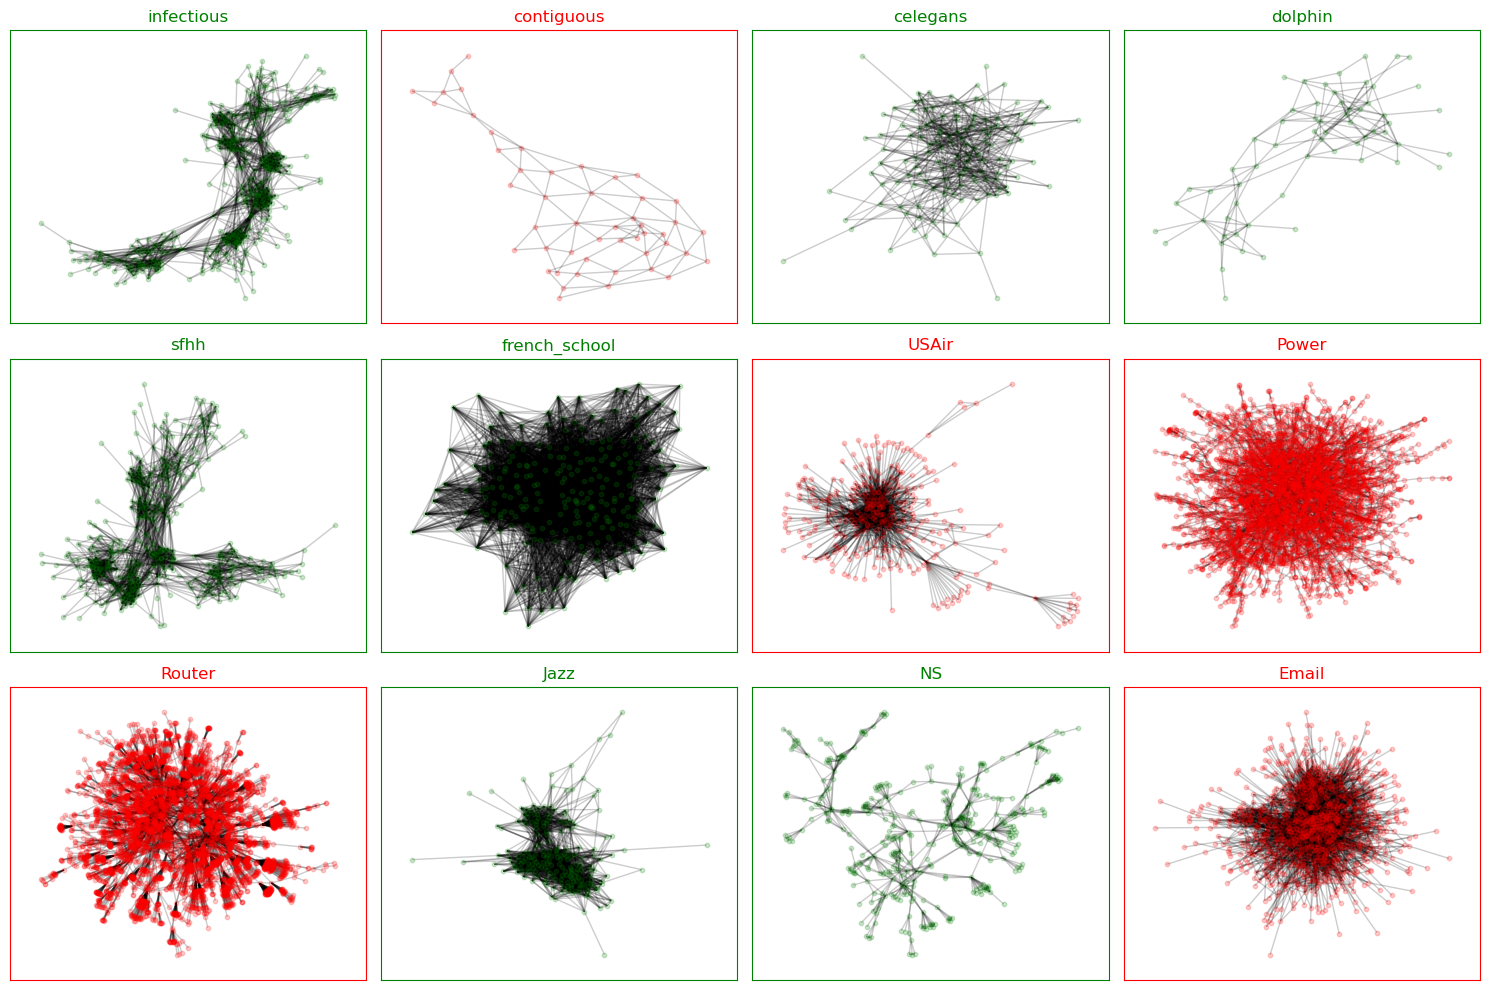

In [10]:
bad_performer = ['Email', 'Router', 'USAir', 'Power', 'contiguous']
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

for G, name, ax in zip(Gs, names, axs.flatten()):
    color = 'green'
    if name in bad_performer:
        color = 'red'
    
    nx.draw_networkx(G, with_labels=False, node_size=10, alpha=.2, ax=ax, node_color=color)

    ax.set_title(name, color=color)

    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color(color)

plt.tight_layout()

In [11]:
methods_1_5 = df_compare.index[0:5]
methods_6_9 = df_compare.index[5:9]
methods_2 = df_compare.index[-2:]

(array([ 2.,  1.,  5.,  3.,  3.,  2.,  3., 13., 12., 12., 14., 29., 26.,
        35., 43., 45., 34., 30., 21., 15., 16., 18., 12.,  4.,  3.,  4.,
         1.,  3.,  0.,  1.]),
 array([-165.4       , -154.37333333, -143.34666667, -132.32      ,
        -121.29333333, -110.26666667,  -99.24      ,  -88.21333333,
         -77.18666667,  -66.16      ,  -55.13333333,  -44.10666667,
         -33.08      ,  -22.05333333,  -11.02666667,    0.        ,
          11.02666667,   22.05333333,   33.08      ,   44.10666667,
          55.13333333,   66.16      ,   77.18666667,   88.21333333,
          99.24      ,  110.26666667,  121.29333333,  132.32      ,
         143.34666667,  154.37333333,  165.4       ]),
 <BarContainer object of 30 artists>)

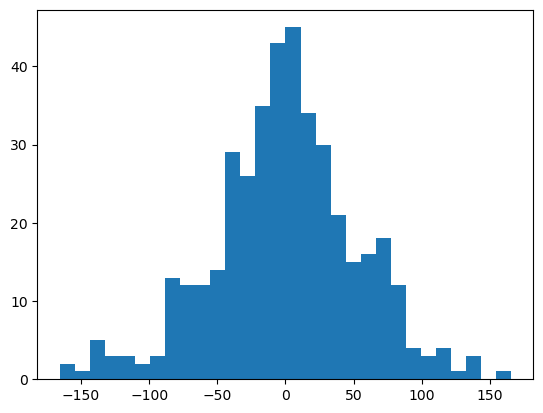

In [12]:
score1 = dfs_diff[0][methods_1_5].mean(axis=1).to_numpy()
plt.hist(score1, bins=30)

(array([ 7.,  3.,  1.,  3.,  0.,  6.,  8., 11., 14., 12., 25., 26., 28.,
        45., 45., 34., 25., 23., 24., 13., 12., 17.,  7.,  8.,  2.,  3.,
         3.,  3.,  0.,  2.]),
 array([-163.   , -151.725, -140.45 , -129.175, -117.9  , -106.625,
         -95.35 ,  -84.075,  -72.8  ,  -61.525,  -50.25 ,  -38.975,
         -27.7  ,  -16.425,   -5.15 ,    6.125,   17.4  ,   28.675,
          39.95 ,   51.225,   62.5  ,   73.775,   85.05 ,   96.325,
         107.6  ,  118.875,  130.15 ,  141.425,  152.7  ,  163.975,
         175.25 ]),
 <BarContainer object of 30 artists>)

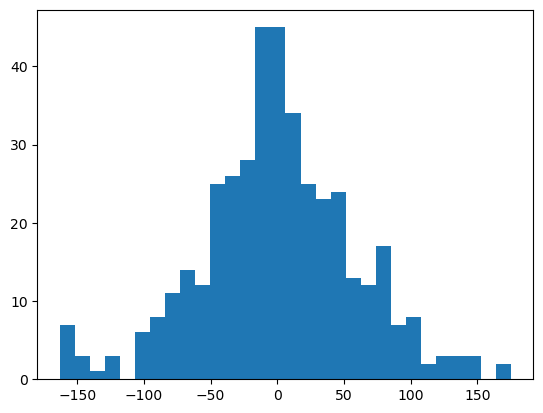

In [13]:
score2 = dfs_diff[0][methods_6_9].mean(axis=1)
plt.hist(score2, bins=30)

(array([ 1.,  0.,  1.,  3.,  1.,  2., 10., 15.,  9., 15., 26., 30., 41.,
        39., 45., 32., 38., 27., 10., 26., 12.,  7.,  6.,  5.,  4.,  2.,
         2.,  0.,  0.,  1.]),
 array([-269.5       , -250.78333333, -232.06666667, -213.35      ,
        -194.63333333, -175.91666667, -157.2       , -138.48333333,
        -119.76666667, -101.05      ,  -82.33333333,  -63.61666667,
         -44.9       ,  -26.18333333,   -7.46666667,   11.25      ,
          29.96666667,   48.68333333,   67.4       ,   86.11666667,
         104.83333333,  123.55      ,  142.26666667,  160.98333333,
         179.7       ,  198.41666667,  217.13333333,  235.85      ,
         254.56666667,  273.28333333,  292.        ]),
 <BarContainer object of 30 artists>)

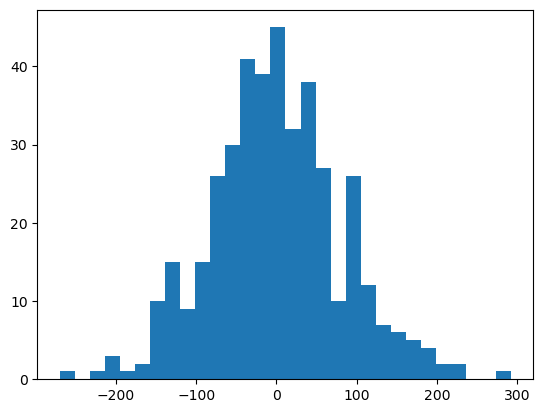

In [14]:
score3 = dfs_diff[0][methods_2].mean(axis=1)
plt.hist(score3, bins=30)

In [23]:
# import kendells tau to evaluate metric performance
networks = ['french_school', 'Jazz', 'NS', 'Email', 'USAir', 'Power', 'Router', 'infectious', 'contiguous', 'celegans', 'dolphin', 'sfhh']
gli_tau = [.884, .805, .592, .74, .773, .577, .409, .722, .771, .759, .717, .714]
ninl_tau = [.882, .801, .595, .755, .77, .576, .409, .721, .769, .778, .73, .714]
improved_grav_c2_tau = [.881, .805, .593, .746, .773, .577, .409, .725, .764, .767, .72, .718]
mcde_tau = [.886, .811, .596, .768, .769, .581, .409, .732, .763, .804, .737, .727]
mcdwe_tau = [.887, .812, .597, .769, .768, .581, .409, .735, .763, .803, .742, .729]
kendell_tau_df = pd.DataFrame({'network': networks, 'gli_tau': gli_tau, 'ninl_tau': ninl_tau, 'improved_gravity_centrality2_tau': improved_grav_c2_tau, 'mcde_tau': mcde_tau, 'mcdwe_tau': mcdwe_tau})
kendell_tau_df

,network,gli_tau,ninl_tau,improved_gravity_centrality2_tau,mcde_tau,mcdwe_tau
0,french_school,0.884,0.882,0.881,0.886,0.887
1,Jazz,0.805,0.801,0.805,0.811,0.812
2,NS,0.592,0.595,0.593,0.596,0.597
3,Email,0.740,0.755,0.746,0.768,0.769
4,USAir,0.773,0.770,0.773,0.769,0.768
5,Power,0.577,0.576,0.577,0.581,0.581
6,Router,0.409,0.409,0.409,0.409,0.409
7,infectious,0.722,0.721,0.725,0.732,0.735
8,contiguous,0.771,0.769,0.764,0.763,0.763
9,celegans,0.759,0.778,0.767,0.804,0.803


In [38]:
kendell_tau_df[kendell_tau_df['network'] == 'Jazz'].drop(columns=['network']).mean(axis=1).to_numpy()[0]

0.8068

['mcdwe_1_hop_ranked_diff', 'mcde_1_hop_ranked_diff', 'improved_gravity_centrality2_1_hop_ranked_diff', 'ninl_1_hop_ranked_diff', 'gli_method_1_hop_ranked_diff']
['infectious', 'dolphin', 'sfhh', 'french_school', 'USAir', 'Power', 'Router', 'Jazz', 'NS', 'Email']
infectious
dolphin
sfhh
french_school
USAir
Power
Router
Jazz
NS
Email


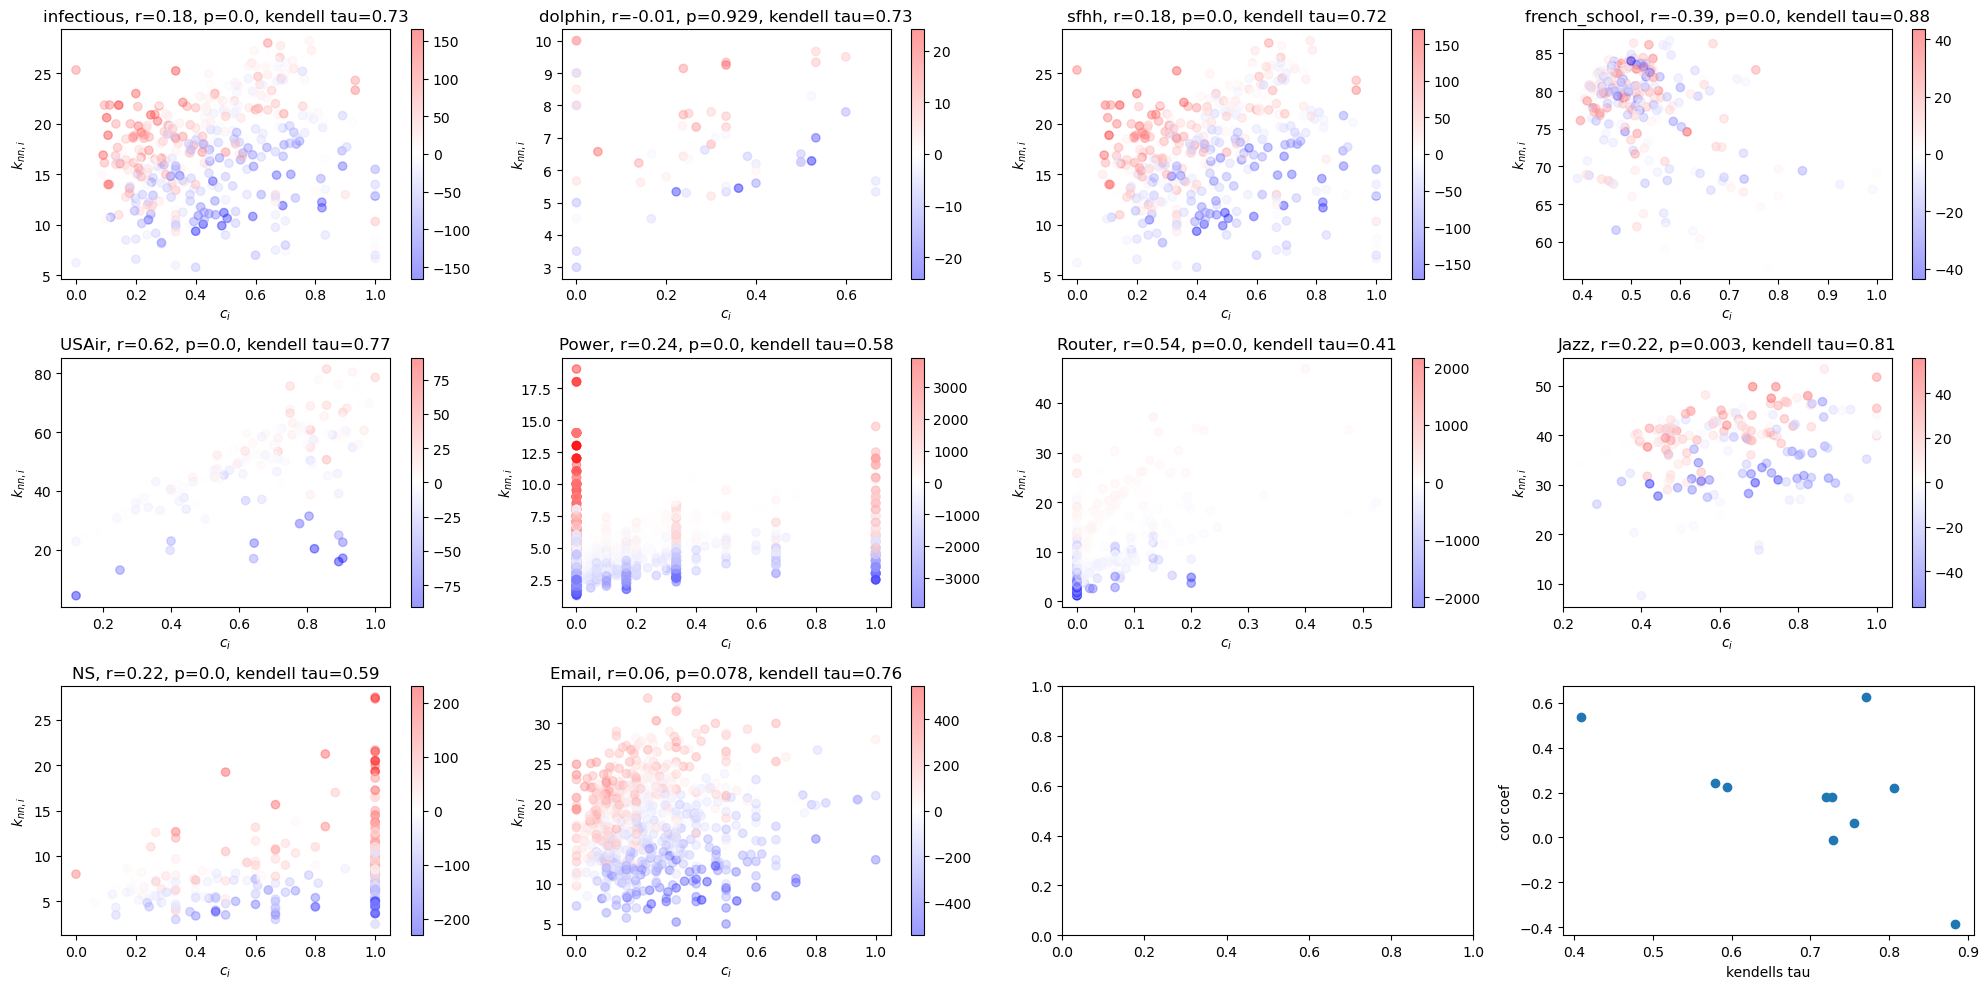

In [40]:
def clustering_nndegree_score(methods):
    print(list(methods))
    fig, axs = plt.subplots(3, 4, figsize=(20, 10))
    axs = axs.flatten()

    selected_Gs, selected_names, selected_dfs = Gs.copy(), names.copy(), dfs_diff.copy()
    del selected_Gs[1: 3] # remove two graphs due to weird numpy error
    del selected_names[1: 3] # remove two graphs due to weird numpy error
    del selected_dfs[1: 3] # remove two graphs due to weird numpy error
    print(selected_names)
    taus, cors = [], []

    for G, name, ax, df in zip(selected_Gs, selected_names, axs, selected_dfs):
        print(name)
        k_tau = kendell_tau_df[kendell_tau_df['network'] == name].drop(columns=['network']).mean(axis=1).to_numpy()[0]
        nn_degree = np.array(list(nx.average_neighbor_degree(G).values()))
        clustering_coef = np.array(list(nx.clustering(G).values()))
        degrees = np.array(nx.degree(G))[:, 1]
        max_degree = degrees.max()
        rel_degree = degrees / max_degree
        threshold = .05
        mask = rel_degree >= threshold
        cor_coef, p_val = pearsonr(clustering_coef[mask], nn_degree[mask])
        mean_score = df[methods].mean(axis=1).to_numpy()[mask]
        v = np.max(np.absolute(mean_score))
        taus.append(k_tau)
        cors.append(cor_coef)

        ax.set_title(f'{name}, r={round(cor_coef, 2)}, p={round(p_val, 3)}, kendell tau={round(k_tau, 2)}')
        im = ax.scatter(clustering_coef[mask], nn_degree[mask], c=mean_score, cmap='bwr', alpha=.4, vmin=-v, vmax=v)
        fig.colorbar(im, ax=ax)
        ax.set_xlabel(r'$c_i$')
        ax.set_ylabel(r'$k_{nn, i}$')
    
    axs[-1].scatter(taus, cors)
    axs[-1].set_xlabel('kendells tau')
    axs[-1].set_ylabel('cor coef')

    plt.tight_layout()
clustering_nndegree_score(methods_1_5)

['mcdwe_1_hop_ranked_diff', 'mcde_1_hop_ranked_diff', 'improved_gravity_centrality2_1_hop_ranked_diff', 'ninl_1_hop_ranked_diff', 'gli_method_1_hop_ranked_diff']
['infectious', 'dolphin', 'sfhh', 'french_school', 'USAir', 'Power', 'Router', 'Jazz', 'NS', 'Email']
infectious
dolphin
sfhh
french_school
USAir
Power
Router
Jazz
NS
Email


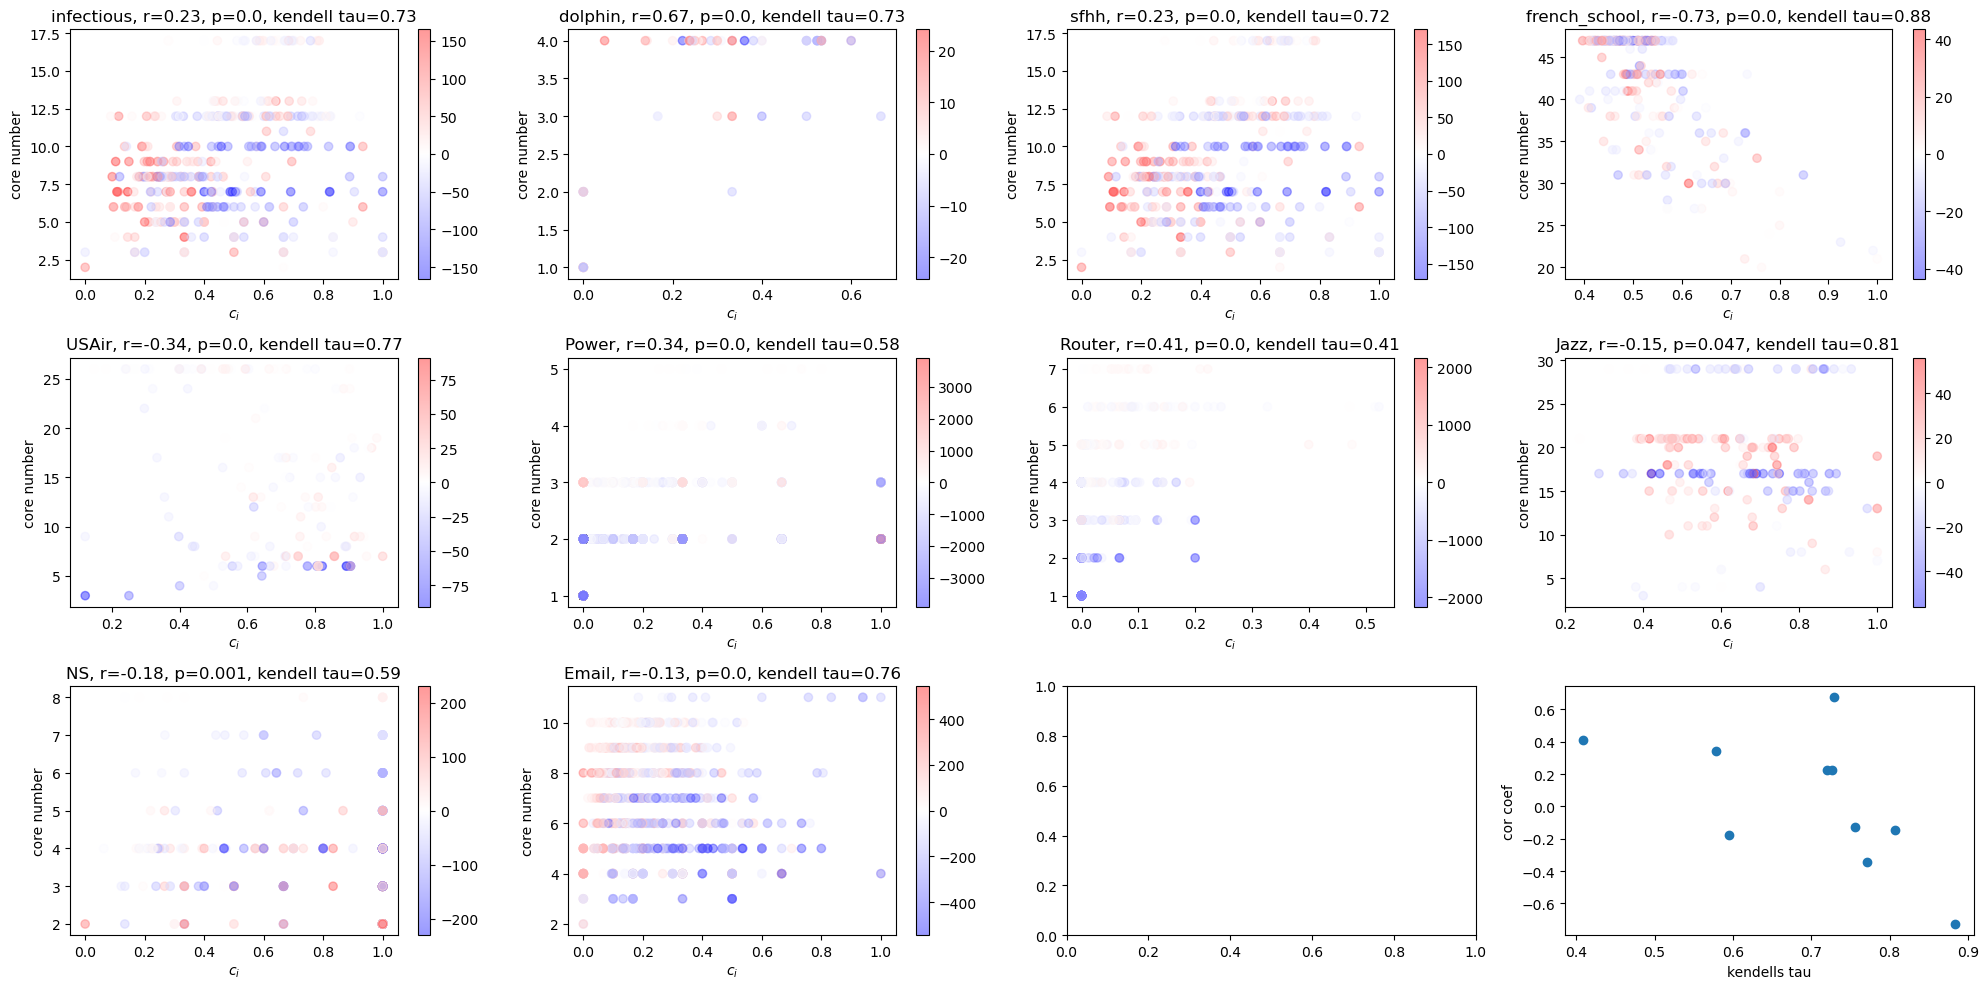

In [43]:
def clustering_kcore_score(methods):
    print(list(methods))
    fig, axs = plt.subplots(3, 4, figsize=(20, 10))
    axs = axs.flatten()

    selected_Gs, selected_names, selected_dfs = Gs.copy(), names.copy(), dfs_diff.copy()
    del selected_Gs[1: 3] # remove two graphs due to weird numpy error
    del selected_names[1: 3] # remove two graphs due to weird numpy error
    del selected_dfs[1: 3] # remove two graphs due to weird numpy error
    print(selected_names)
    taus, cors = [], []

    for G, name, ax, df in zip(selected_Gs, selected_names, axs, selected_dfs):
        print(name)
        k_tau = kendell_tau_df[kendell_tau_df['network'] == name].drop(columns=['network']).mean(axis=1).to_numpy()[0]
        core_number = np.array(list(nx.core_number(G).values()))
        clustering_coef = np.array(list(nx.clustering(G).values()))
        degrees = np.array(nx.degree(G))[:, 1]
        max_degree = degrees.max()
        rel_degree = degrees / max_degree
        threshold = .05
        mask = rel_degree >= threshold
        cor_coef, p_val = pearsonr(clustering_coef[mask], core_number[mask])
        mean_score = df[methods].mean(axis=1).to_numpy()[mask]
        v = np.max(np.absolute(mean_score))
        taus.append(k_tau)
        cors.append(cor_coef)

        ax.set_title(f'{name}, r={round(cor_coef, 2)}, p={round(p_val, 3)}, kendell tau={round(k_tau, 2)}')
        im = ax.scatter(clustering_coef[mask], core_number[mask], c=mean_score, cmap='bwr', alpha=.4, vmin=-v, vmax=v)
        fig.colorbar(im, ax=ax)
        ax.set_xlabel(r'$c_i$')
        ax.set_ylabel(r'core number')
    
    axs[-1].scatter(taus, cors)
    axs[-1].set_xlabel('kendells tau')
    axs[-1].set_ylabel('cor coef')

    plt.tight_layout()
clustering_kcore_score(methods_1_5)

['mcdwe_1_hop_ranked_diff', 'mcde_1_hop_ranked_diff', 'improved_gravity_centrality2_1_hop_ranked_diff', 'ninl_1_hop_ranked_diff', 'gli_method_1_hop_ranked_diff']
['infectious', 'dolphin', 'sfhh', 'french_school', 'USAir', 'Power', 'Router', 'Jazz', 'NS', 'Email']
infectious
dolphin
sfhh
french_school
USAir
Power
Router
Jazz
NS
Email


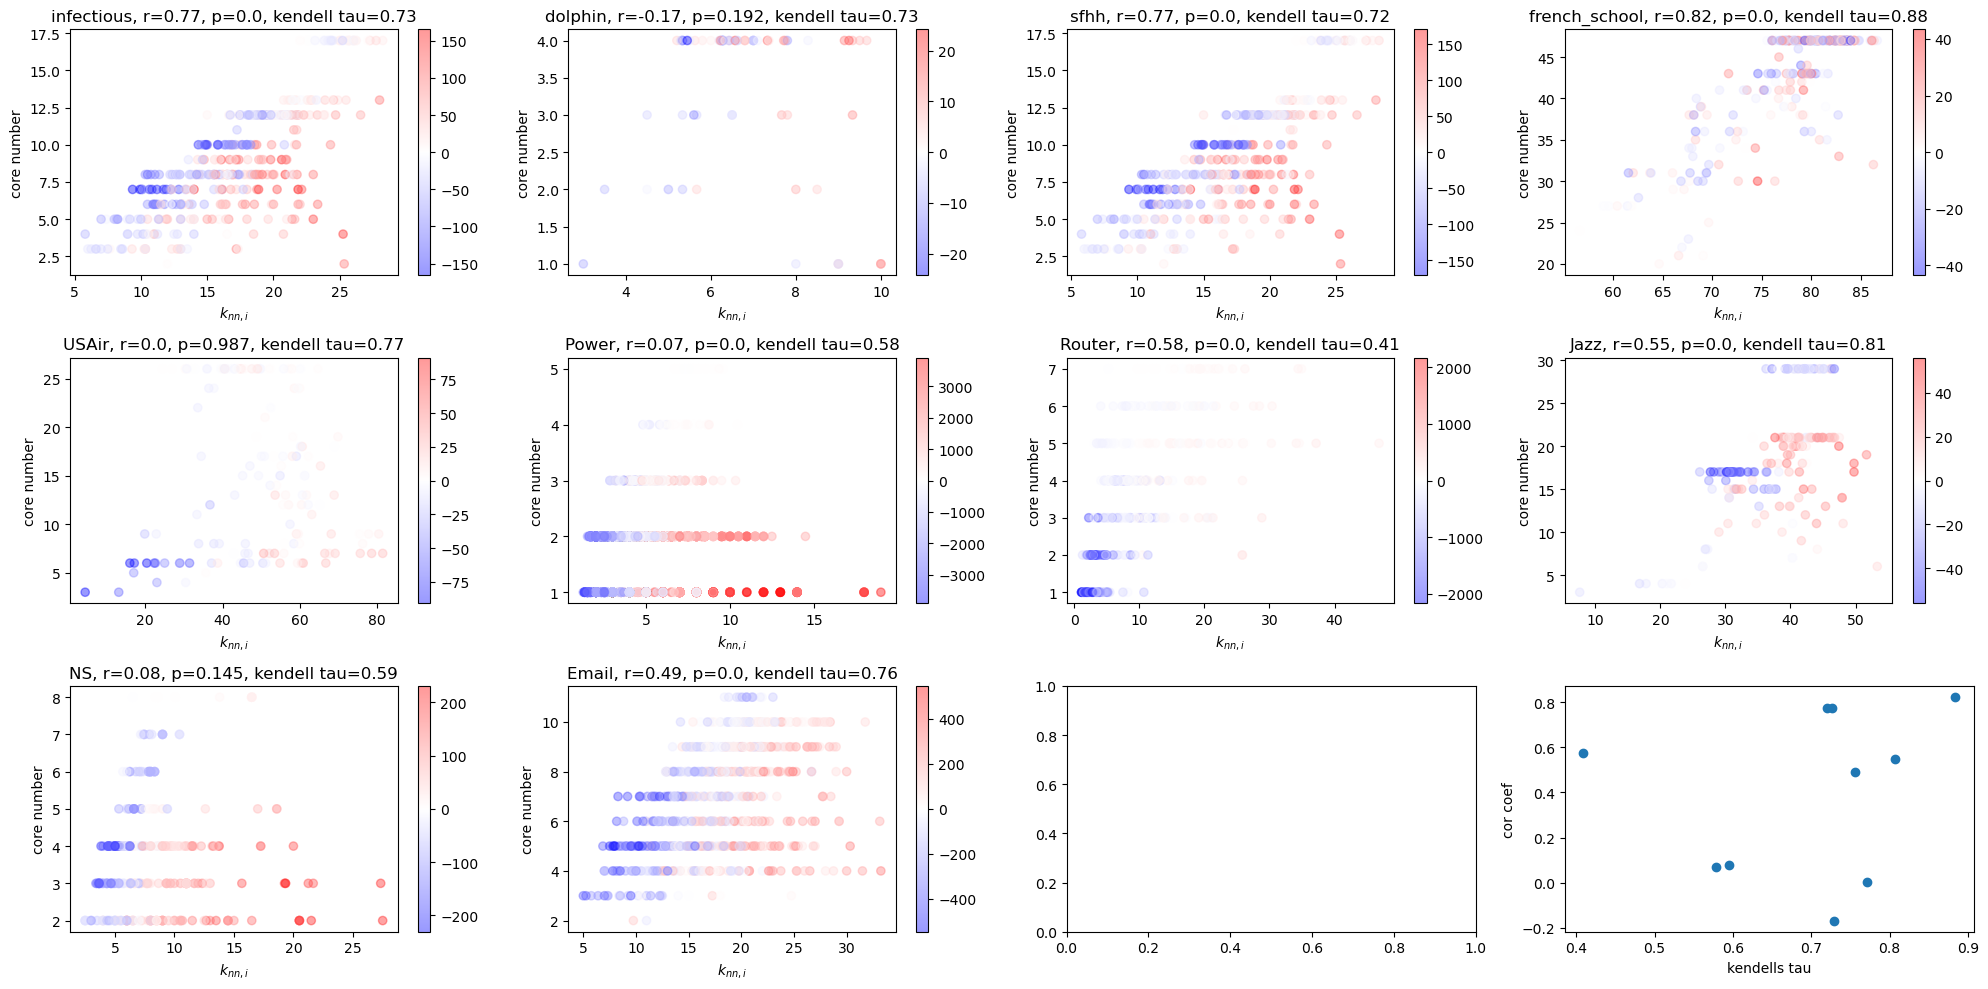

In [45]:
def nndegree_kcore_score(methods):
    print(list(methods))
    fig, axs = plt.subplots(3, 4, figsize=(20, 10))
    axs = axs.flatten()

    selected_Gs, selected_names, selected_dfs = Gs.copy(), names.copy(), dfs_diff.copy()
    del selected_Gs[1: 3] # remove two graphs due to weird numpy error
    del selected_names[1: 3] # remove two graphs due to weird numpy error
    del selected_dfs[1: 3] # remove two graphs due to weird numpy error
    print(selected_names)
    taus, cors = [], []

    for G, name, ax, df in zip(selected_Gs, selected_names, axs, selected_dfs):
        print(name)
        k_tau = kendell_tau_df[kendell_tau_df['network'] == name].drop(columns=['network']).mean(axis=1).to_numpy()[0]
        core_number = np.array(list(nx.core_number(G).values()))
        nn_degree = np.array(list(nx.average_neighbor_degree(G).values()))
        degrees = np.array(nx.degree(G))[:, 1]
        max_degree = degrees.max()
        rel_degree = degrees / max_degree
        threshold = .05
        mask = rel_degree >= threshold
        cor_coef, p_val = pearsonr(nn_degree[mask], core_number[mask])
        mean_score = df[methods].mean(axis=1).to_numpy()[mask]
        v = np.max(np.absolute(mean_score))
        taus.append(k_tau)
        cors.append(cor_coef)

        ax.set_title(f'{name}, r={round(cor_coef, 2)}, p={round(p_val, 3)}, kendell tau={round(k_tau, 2)}')
        im = ax.scatter(nn_degree[mask], core_number[mask], c=mean_score, cmap='bwr', alpha=.4, vmin=-v, vmax=v)
        fig.colorbar(im, ax=ax)
        ax.set_xlabel(r'$k_{nn, i}$')
        ax.set_ylabel(r'core number')
    
    axs[-1].scatter(taus, cors)
    axs[-1].set_xlabel('kendells tau')
    axs[-1].set_ylabel('cor coef')

    plt.tight_layout()
nndegree_kcore_score(methods_1_5)

['mcdwe_1_hop_ranked_diff', 'mcde_1_hop_ranked_diff', 'improved_gravity_centrality2_1_hop_ranked_diff', 'ninl_1_hop_ranked_diff', 'gli_method_1_hop_ranked_diff']
['infectious', 'dolphin', 'sfhh', 'french_school', 'USAir', 'Power', 'Router', 'Jazz', 'NS', 'Email']
infectious
dolphin
sfhh
french_school
USAir
Power
Router
Jazz
NS
Email


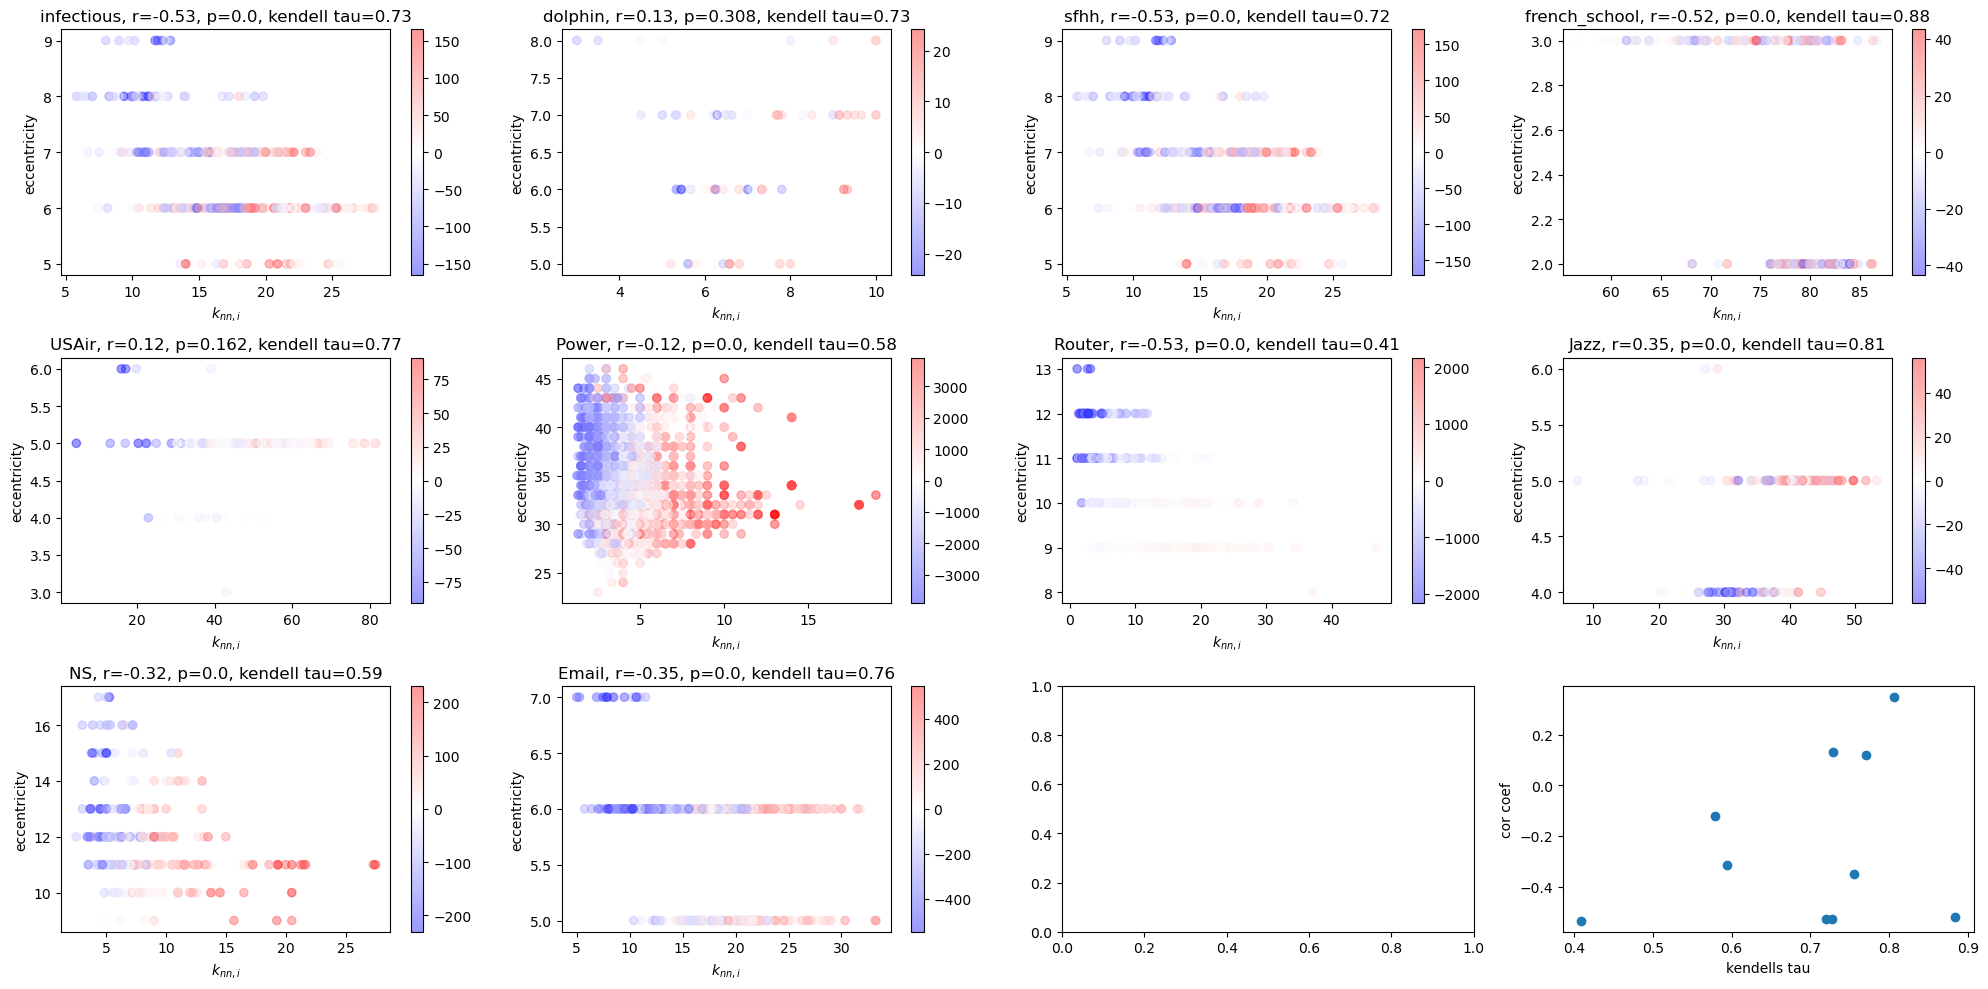

In [46]:
def nndegree_eccentricity_score(methods):
    print(list(methods))
    fig, axs = plt.subplots(3, 4, figsize=(20, 10))
    axs = axs.flatten()

    selected_Gs, selected_names, selected_dfs = Gs.copy(), names.copy(), dfs_diff.copy()
    del selected_Gs[1: 3] # remove two graphs due to weird numpy error
    del selected_names[1: 3] # remove two graphs due to weird numpy error
    del selected_dfs[1: 3] # remove two graphs due to weird numpy error
    print(selected_names)
    taus, cors = [], []

    for G, name, ax, df in zip(selected_Gs, selected_names, axs, selected_dfs):
        print(name)
        k_tau = kendell_tau_df[kendell_tau_df['network'] == name].drop(columns=['network']).mean(axis=1).to_numpy()[0]
        eccentricity = np.array(list(nx.eccentricity(G).values()))
        nn_degree = np.array(list(nx.average_neighbor_degree(G).values()))
        degrees = np.array(nx.degree(G))[:, 1]
        max_degree = degrees.max()
        rel_degree = degrees / max_degree
        threshold = .05
        mask = rel_degree >= threshold
        cor_coef, p_val = pearsonr(nn_degree[mask], eccentricity[mask])
        mean_score = df[methods].mean(axis=1).to_numpy()[mask]
        v = np.max(np.absolute(mean_score))
        taus.append(k_tau)
        cors.append(cor_coef)

        ax.set_title(f'{name}, r={round(cor_coef, 2)}, p={round(p_val, 3)}, kendell tau={round(k_tau, 2)}')
        im = ax.scatter(nn_degree[mask], eccentricity[mask], c=mean_score, cmap='bwr', alpha=.4, vmin=-v, vmax=v)
        fig.colorbar(im, ax=ax)
        ax.set_xlabel(r'$k_{nn, i}$')
        ax.set_ylabel(r'eccentricity')
    
    axs[-1].scatter(taus, cors)
    axs[-1].set_xlabel('kendells tau')
    axs[-1].set_ylabel('cor coef')

    plt.tight_layout()
nndegree_eccentricity_score(methods_1_5)

Hypothese: Das Infektionsrisiko in SIR hängt von k_nn_i ab. Zentralitätsmaße kennen k_nn_i im 1-hop Szenario nicht vollständig, stattdessen wird der Clustering Koeffizient benutzt um das Infektionsrisiko vorherzusagen. Wenn das Netzwerk eine gute Korrelation zwischen c_i und k_nn_i hat (Wolke hat kleine Varianz), dann passen die Vorhersagen von Zentralitätsmaß und SIR gut zusammen. Anderen falls wird das Infektionsrisiko unterschätzt, wenn k_nn_i >> c_i oder überschätzt wenn k_nn_i << c_i. <br><br>
Scheinbar ist der Zusammenhang genau anders herum. Woran könnte das liegen?<br>

In [ ]:
def local_cc(ego_graph, cur_G):
    communities = community_louvain.best_partition(ego_graph)
    coms = {}
    for k, v in communities.items():
        if v in coms:
            coms[v].append(k)
        else:
            coms[v] = [k]
    final_local_cc = []
    for com in coms.values():
        subg = nx.induced_subgraph(cur_G, list(com))
        num_edges = len(list(subg.edges()))
        num_nodes = len(list(subg.nodes()))
        loc_cc = (num_edges + 1) * num_nodes
        final_local_cc.append(loc_cc)
    return sum(final_local_cc)